Binary Search Trees
============
Definition
----------
A binary tree that satisfies the binary search tree property, such that the value of each node should be:
- Greater than the values in all nodes in the left subtree, 
- Smaller than the values in all nodes of the right subtree.

In [2]:
class BinaryTree(object):
    def __init__(self, value=None, left=None, right=None):
        self.left = left
        self.right = right
        self.value = value

        
def render_binary_tree(tree):
    from graphviz import Graph

    dot = Graph()
    def render_inner(prev, tree, graph):
        if tree:
            graph.node(str(tree.value))
            render_inner(tree, tree.left, graph)
            render_inner(tree, tree.right, graph)
            if prev:
                graph.edge(str(prev.value), str(tree.value))
        return graph
    
    return render_inner(None, tree, dot)

Inserting Values
----------------
Inserting nodes into the binary tree requires $\mathcal{O}(n\log{}n)$ comparisons, and can be done destructively (e.g. we modify the tree in place) as follows:

In [3]:
def binary_search_tree_insert(root, value):
    if value < root.value:
        if root.left is None:
            root.left = BinaryTree(value)
        else:
            binary_search_tree_insert(root.left, value)
    else:
        if root.right is None:
            root.right = BinaryTree(value)
        else:
            binary_search_tree_insert(root.right, value)


Using the above, we can define a make_binary_tree function to generate a tree from a list of values.

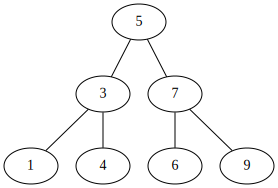

In [4]:
def make_binary_tree(insert_func, values):
    root = None
    for val in values:
        if not root:
            root = BinaryTree(val)
        else:
            insert_func(root, val)
    return root

binary_tree = make_binary_tree(binary_search_tree_insert, [5,3,7,4,1,9,6])

render_binary_tree(binary_tree)

Traversal
---------

### Pre-Order Traversal
The pattern for the Pre-Order traversal is as follows:

[node] + [left subtree PreOT] + [right subtree PreOT]

In [28]:
def pre_order_traversal(binary_tree):
    if not binary_tree:
        return []
    else:
        return [binary_tree.value] + pre_order_traversal(binary_tree.left) + pre_order_traversal(binary_tree.right)
            
pre_order_traversal(binary_tree)      

[5, 3, 1, 4, 7, 6, 9]

### In-Order Traversal

The pattern for the In-Order traversal is as follows:

[left subtree InOT] + [node] + [right subtree InOT]

In [29]:
def in_order_traversal(binary_tree):
    if not binary_tree:
        return []
    else:
        return in_order_traversal(binary_tree.left) + [binary_tree.value] + in_order_traversal(binary_tree.right)
            
in_order_traversal(binary_tree)

[1, 3, 4, 5, 6, 7, 9]

- In a search tree, the in_order_traversal clearly retrieves the data in sorted order.
- The in order traversal can be seen as a flattened version of the tree.

### Post-Order Traversal
A post-order traversal works recursively as follows:

The pattern for the Pre-Order traversal is as follows:

[left subtree PostOT] + [right subtree PostOT] + [node] 

In [30]:
def post_order_traversal(binary_tree):
    if not binary_tree:
        return []
    else:
        return post_order_traversal(binary_tree.left) + post_order_traversal(binary_tree.right) + [binary_tree.value]
            
post_order_traversal(binary_tree)

[1, 4, 3, 6, 9, 7, 5]

Rebuilding a Tree from Traversal Arrays
---------------------------------------
It's possible to rebuild a tree from the in-order traversal, and the post or pre-order traversal. See [this](Interview%20Questions%20-%20recover%20binary%20tree%20from%20preorder%20and%20inorder%20traversal.ipynb) interview question. Essentially, the in-order traversal gives you a flattened representation of the tree, and the pre/post-order traversal gives you the order in which the nodes should be processed, so you can rebuild the tree by recursively.

## Searching
### Non Search Trees - Depth First Search
A depth first search can be performed by applying either a pre, post or in-order traveral to the tree, stopping when the required node is found. 

### Non Search Trees - Breadth First Search
In a breadth first search the algorithm visits all the sibling nodes of the tree e.g. for the example above, the BFS would produce the following result: [5,3,7,1,4,6,9]

Interestingly BFS does not lend itself to a recursive implementation, and instead is best implemented using an auxilliary queue, to store all of the nodes at the next level while processing those at the current level. e.g.

In [31]:
from collections import deque

def binary_tree_bfs(tree):
    q = deque([tree])
    result = []
    
    while q:
        node = q.popleft()
        result.append(node.value)
        
        if node.left:
            q.append(node.left)
        
        if node.right:
            q.append(node.right)
    
    return result

binary_tree_bfs(binary_tree)

[5, 3, 7, 1, 4, 6, 9]

Other Algorithms
----------------
- [Reversing/Inverting a binary tree](Interview%20Questions%20-%20Invert%20a%20Binary%20Tree.ipynb)